

## 📝 Problem Statement

Goal → Predict health risk levels (Low, Medium, High) based on AQI values and pollutants.

Why? → Helps citizens & policymakers understand risk to respiratory health.

Type → Multi-class classification problem.

In this project, we aim to:  
- Explore **Air Quality Data in India**  
- Focus on pollutants: **PM2.5, NO2, SO2**  
- Understand **missing values, data types, and summary statistics**  
- Prepare the dataset for **future risk analysis and visualization**  


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import joblib
print("✅ Libraries imported successfully from Global Python!")


✅ Libraries imported successfully from Global Python!


In [27]:
# Load dataset
df = pd.read_csv("city_day_filled.csv")

# Display shape of dataset
print("✅ Dataset loaded successfully!")






✅ Dataset loaded successfully!


In [28]:
# Preview top 5 rows
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,-15.669017,178.929580,0.92,18.22,17.15,54.123493,0.92,27.64,133.36,0.00,0.02,0.00,28.746128,Moderate
1,Ahmedabad,2015-01-02,27.920434,297.015480,0.97,15.69,16.46,25.241901,0.97,24.55,34.06,3.68,5.50,3.77,156.953092,Moderate
2,Ahmedabad,2015-01-03,166.703769,201.625043,17.40,19.30,29.70,38.216233,17.40,29.07,30.70,6.80,16.40,2.25,33.573500,Moderate
3,Ahmedabad,2015-01-04,27.952039,207.883909,1.70,18.48,17.97,7.566766,1.70,18.59,36.08,4.43,10.14,1.00,150.870260,Moderate
4,Ahmedabad,2015-01-05,89.884918,46.150051,22.10,21.42,37.76,24.849399,22.10,39.33,39.31,7.01,18.89,2.78,127.487037,Moderate


In [29]:
# Explore And understand the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       29531 non-null  float64
 3   PM10        29531 non-null  float64
 4   NO          29531 non-null  float64
 5   NO2         29531 non-null  float64
 6   NOx         29531 non-null  float64
 7   NH3         29531 non-null  float64
 8   CO          29531 non-null  float64
 9   SO2         29531 non-null  float64
 10  O3          29531 non-null  float64
 11  Benzene     29531 non-null  float64
 12  Toluene     29531 non-null  float64
 13  Xylene      29531 non-null  float64
 14  AQI         29531 non-null  float64
 15  AQI_Bucket  29531 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [30]:
#Statistics of the dataset 
df.describe()



,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,67.252456,117.948770,17.591381,28.646197,32.222485,23.550952,2.233937,14.496146,34.492663,3.185453,8.706831,3.089832,166.535142
std,64.646291,90.751398,22.761511,24.443636,31.588282,25.631697,6.969622,18.138290,21.690791,15.836087,20.016328,6.361318,140.513733
min,-169.514708,-232.584838,-56.215452,-59.440827,-73.028519,-65.984128,-20.110636,-57.139043,-54.794073,-54.843181,-76.552618,-22.100759,-295.869141
25%,28.410041,56.220000,5.520000,11.820000,12.700000,8.148208,0.490000,5.565000,18.943122,0.050000,0.330000,0.000000,81.000000
50%,50.360000,102.510000,10.260000,22.440000,24.300000,18.060000,0.900000,9.430000,31.330000,1.130000,3.550000,1.893481,122.000000
75%,85.675000,162.427003,22.060000,38.840000,42.415000,34.260000,1.530000,16.532519,46.055000,3.870000,12.820000,6.162337,221.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [31]:
# find the missing values 
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


AQI value stats:
count    29531.000000
mean       166.535142
std        140.513733
min       -295.869141
25%         81.000000
50%        122.000000
75%        221.000000
max       2049.000000
Name: AQI, dtype: float64


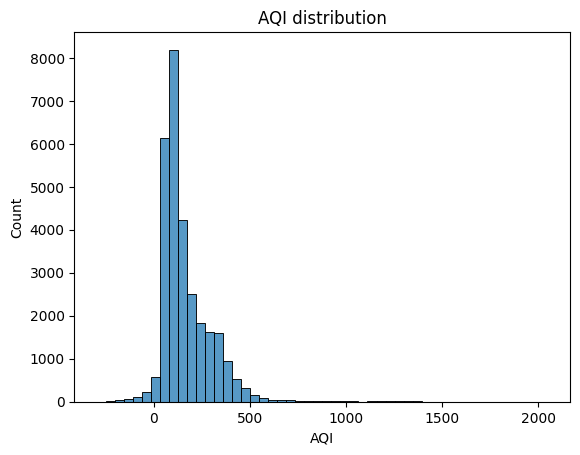

In [32]:
print("\nAQI value stats:")
print(df['AQI'].describe())
sns.histplot(df['AQI'].dropna(), bins=50)
plt.title("AQI distribution")
plt.show()

In [33]:
# Rows and Cols
df.shape

(29531, 16)

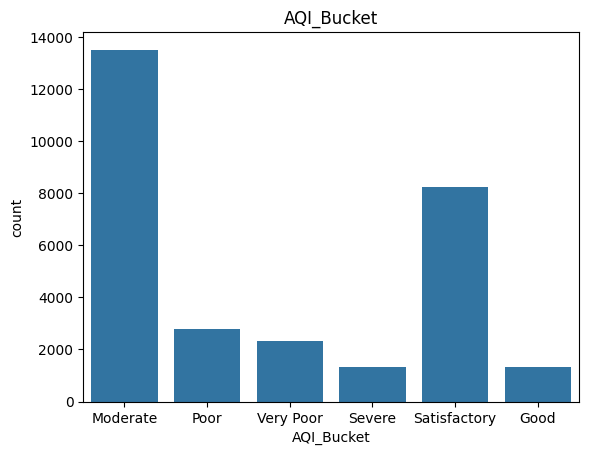

In [34]:
# Univariate Analysis
sns.countplot(x='AQI_Bucket', data=df)
plt.title('AQI_Bucket')
plt.show()

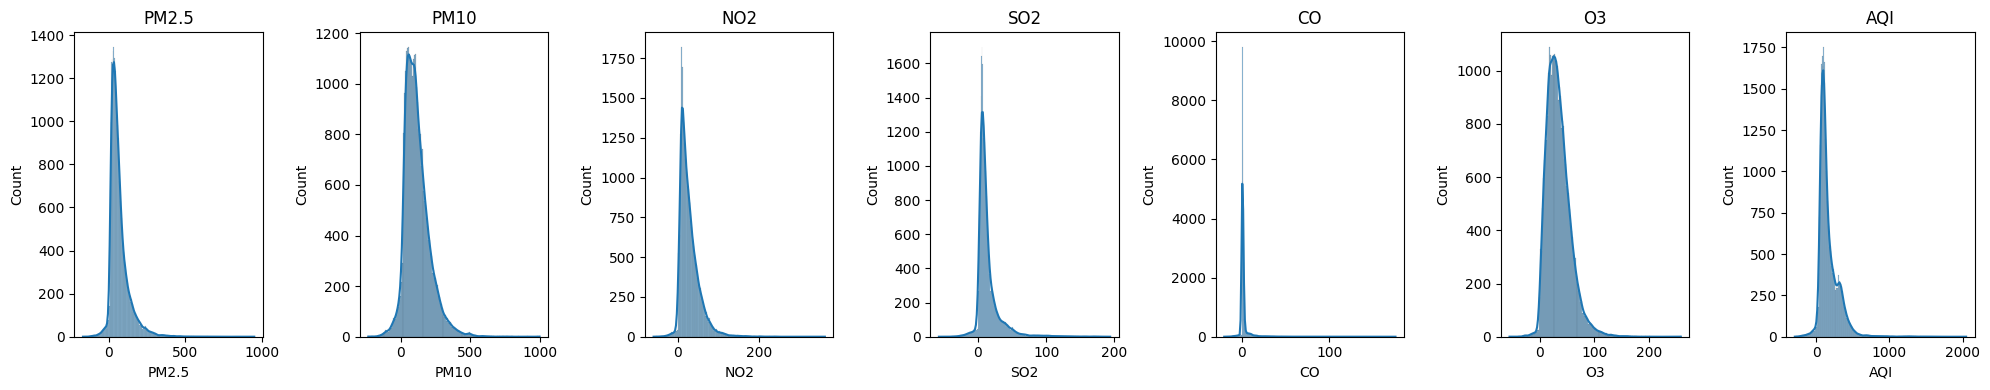

In [35]:
num_cols = ['PM2.5','PM10','NO2','SO2','CO','O3','AQI']

# Make subplots
fig, axes = plt.subplots(1, len(num_cols), figsize=(20, 4))

# Plot histograms
for ax, col in zip(axes, num_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

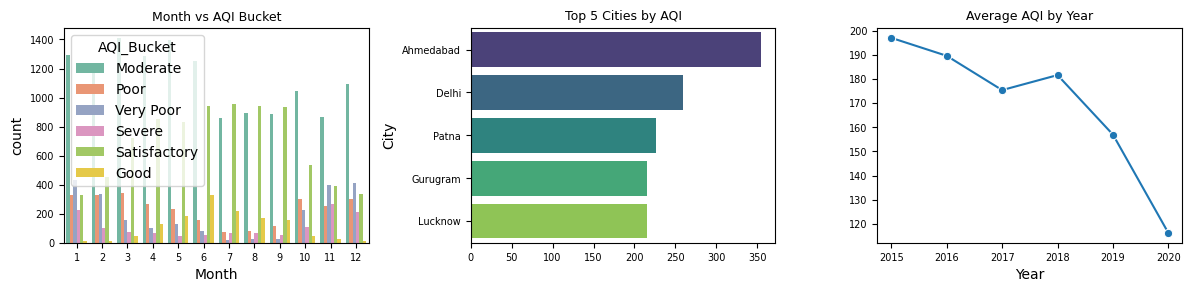

In [36]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')
df['Month'],df['Year']=df['Date'].dt.month,df['Date'].dt.year

fig,ax=plt.subplots(1,3,figsize=(12,3))

sns.countplot(x='Month',hue='AQI_Bucket',data=df,palette="Set2",ax=ax[0])
ax[0].set_title("Month vs AQI Bucket",fontsize=9)
ax[0].tick_params(axis='x',labelsize=7)
ax[0].tick_params(axis='y',labelsize=7)

c=df.groupby('City')['AQI'].mean().nlargest(5)
sns.barplot(x=c.values,y=c.index,hue=c.index,legend=False,palette="viridis",ax=ax[1])
ax[1].set_title("Top 5 Cities by AQI",fontsize=9)
ax[1].tick_params(axis='x',labelsize=7)
ax[1].tick_params(axis='y',labelsize=7)

y=df.groupby('Year')['AQI'].mean()
sns.lineplot(x=y.index,y=y.values,marker="o",ax=ax[2])
ax[2].set_title("Average AQI by Year",fontsize=9)
ax[2].tick_params(axis='x',labelsize=7)
ax[2].tick_params(axis='y',labelsize=7)

plt.tight_layout(pad=1);plt.show()


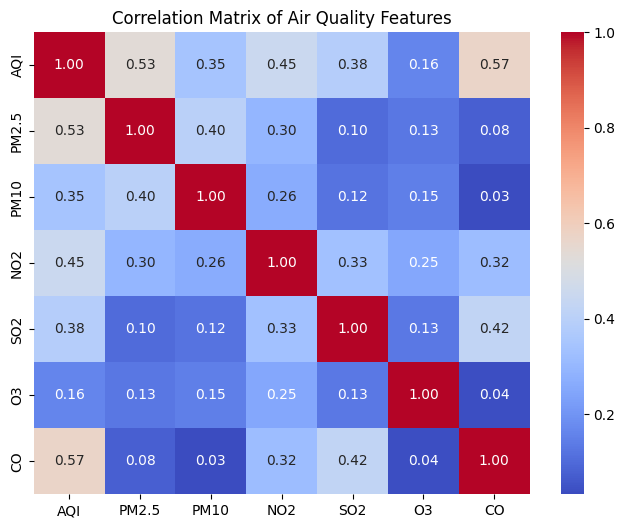

In [37]:
# Select only important numeric columns
selected_cols = ['AQI', 'PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'CO']

# Keep only the ones that exist in df
selected_cols = [col for col in selected_cols if col in df.columns]

plt.figure(figsize=(8, 6))
sns.heatmap(df[selected_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Air Quality Features')
plt.show()


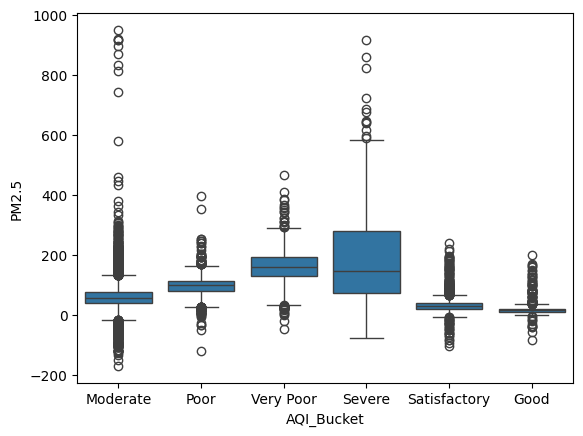

In [38]:
sns.boxplot(x="AQI_Bucket", y="PM2.5", data=df)
plt.show()


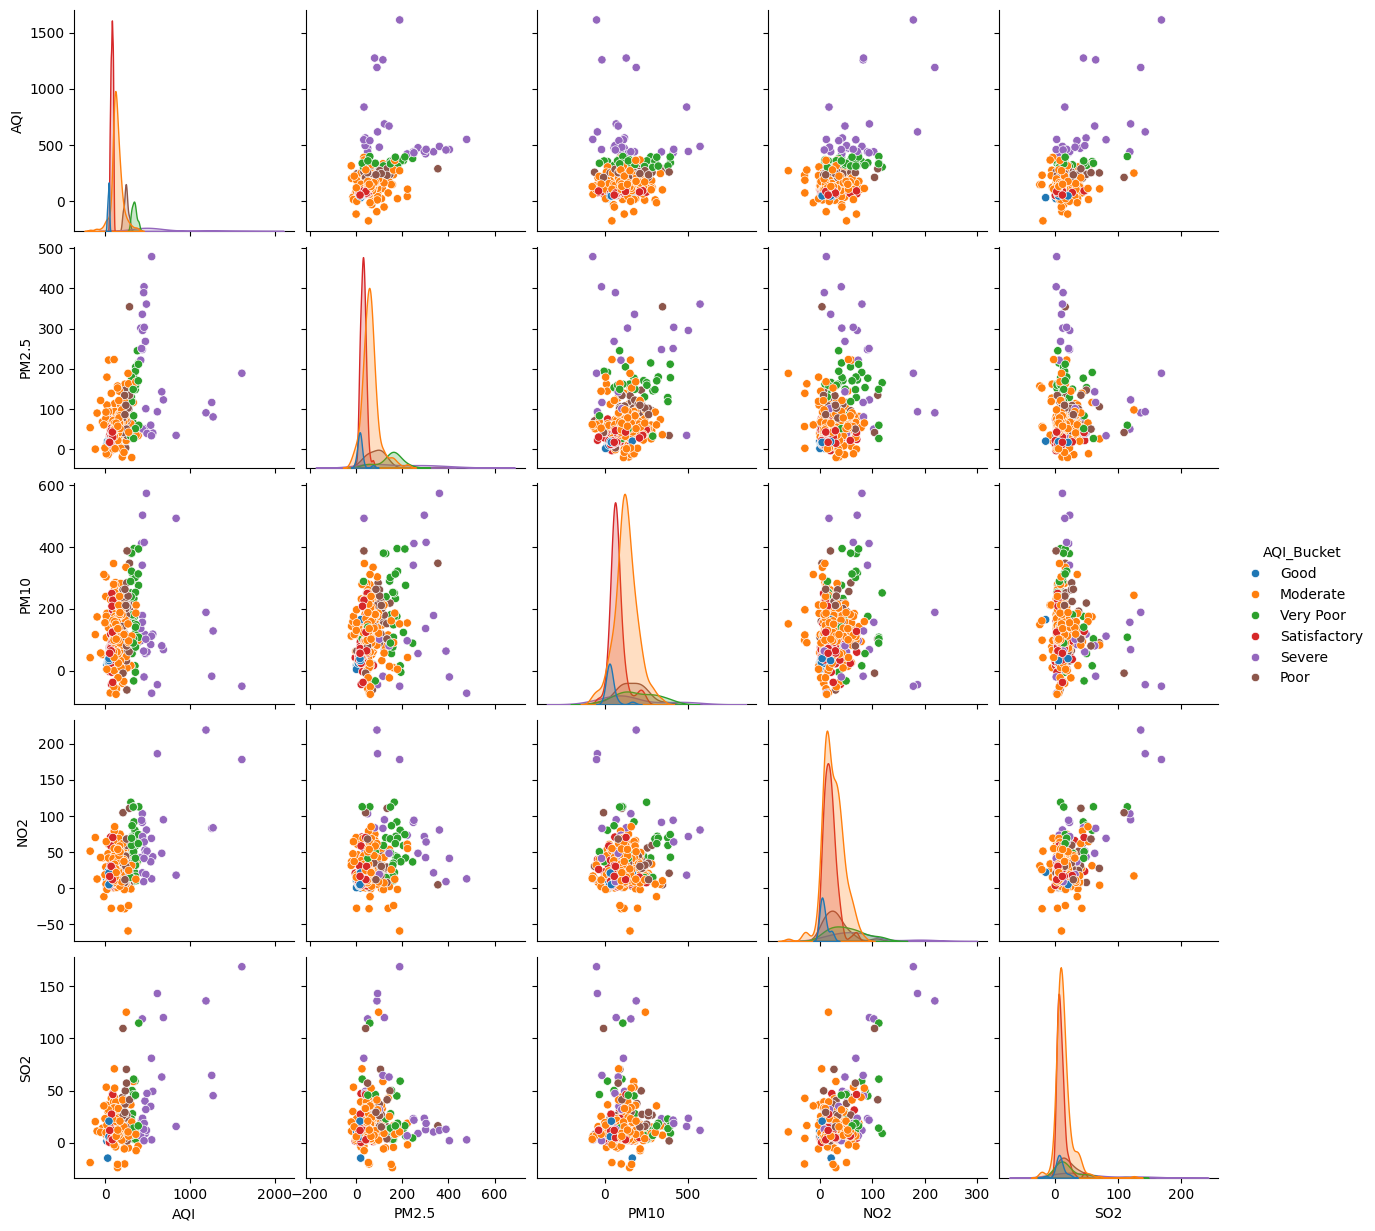

In [39]:
selected_cols = ['AQI', 'PM2.5', 'PM10', 'NO2', 'SO2']
sns.pairplot(df.sample(500), vars=selected_cols, hue='AQI_Bucket')
plt.show()


In [40]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Month',
       'Year'],
      dtype='object')

In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# --- Date Features ---
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year.astype(int)
df['Month'] = df['Date'].dt.month.astype(int)
df['Day'] = df['Date'].dt.day.astype(int)
df['DayOfWeek'] = df['Date'].dt.dayofweek.astype(int)
df.drop(columns=['Date'], inplace=True)

# --- Encode Categorical Features ---
le_bucket = LabelEncoder()
df['AQI_Bucket'] = le_bucket.fit_transform(df['AQI_Bucket'])

df = pd.get_dummies(df, columns=['City'], drop_first=True)

print("✅ Feature Engineering completed!")
print("Columns now:", df.columns.tolist()[:20], "...")


✅ Feature Engineering completed!
Columns now: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Month', 'Year', 'Day', 'DayOfWeek', 'City_Aizawl', 'City_Amaravati'] ...


In [42]:
X = df.drop(columns=['AQI_Bucket'])
y = df['AQI_Bucket']


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [47]:
X_train.shape

(23624, 42)

In [48]:
X_test.shape

(5907, 42)

In [49]:


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [50]:
X_train

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
19730,37.96,73.490000,20.34,30.23,50.59,23.2100,0.80,9.51,31.98,5.630000,...,False,False,True,False,False,False,False,False,False,False
15029,69.37,108.550000,5.36,9.86,13.88,10.2900,1.00,3.70,62.11,0.870000,...,False,False,False,False,False,False,False,False,False,False
23435,21.86,85.400000,31.26,19.20,50.47,1.9564,1.84,24.52,18.42,0.330000,...,False,False,False,False,True,False,False,False,False,False
2743,7.35,18.120000,3.22,6.38,6.10,6.2300,0.46,11.57,21.64,0.220000,...,False,False,False,False,False,False,False,False,False,False
21835,71.59,187.070951,5.42,10.40,10.62,12.0600,1.19,6.89,42.83,15.650000,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27415,18.96,43.820000,2.77,8.43,6.74,3.0200,0.83,6.45,35.51,-6.178836,...,False,False,False,False,False,False,False,False,True,False
16362,84.11,153.060000,3.88,38.32,23.25,13.4900,0.69,6.29,35.30,3.600000,...,False,False,False,False,False,False,False,False,False,False
7574,83.96,151.620000,17.66,6.60,17.59,6.6200,1.00,10.71,19.99,7.020000,...,False,False,False,False,False,False,False,False,False,False
14456,66.48,137.520000,52.09,21.70,108.77,12.8000,0.63,14.10,18.90,0.490000,...,False,False,False,False,False,False,False,False,False,False
